In [8]:
import json
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from plotting_parameters import *

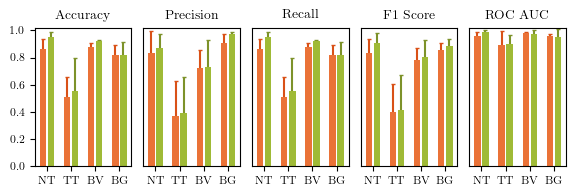

In [28]:
def load_results(file):
    with open(file, 'r') as f:
        results = json.load(f)
        accuracy = results['accuracy']
        precision = results['precision']
        recall = results['recall']
        f1_score = results['f1_score']
        roc_auc = results['roc_auc']
    return accuracy, precision, recall, f1_score, roc_auc

def get_fold_mean(results_dir):
    accuracy_all = []
    precision_all = []  
    recall_all = []
    f1_score_all = []
    roc_auc_all = []
    for i, file in enumerate(['fold1_metrics.json', 'fold2_metrics.json', 'fold3_metrics.json', 'fold4_metrics.json', 'fold5_metrics.json']):     
        accuracy, precision, recall, f1_score, roc_auc = load_results(os.path.join(results_dir, file))
        accuracy_all.append(accuracy)
        precision_all.append(precision)
        recall_all.append(recall)
        f1_score_all.append(f1_score)
        roc_auc_all.append(roc_auc)
    accuracy_all = np.mean(accuracy_all, axis=0)
    precision_all = np.mean(precision_all, axis=0)
    recall_all = np.mean(recall_all, axis=0)
    f1_score_all = np.mean(f1_score_all, axis=0)
    roc_auc_all = np.mean(roc_auc_all, axis=0)
    return [accuracy_all, precision_all, recall_all, f1_score_all, roc_auc_all]

def get_fold_std(results_dir):
    accuracy_all = []
    precision_all = []
    recall_all = []
    f1_score_all = []
    roc_auc_all = []
    for i, file in enumerate(['fold1_metrics.json', 'fold2_metrics.json', 'fold3_metrics.json', 'fold4_metrics.json', 'fold5_metrics.json']):     
        accuracy, precision, recall, f1_score, roc_auc = load_results(os.path.join(results_dir, file))
        accuracy_all.append(accuracy)
        precision_all.append(precision)
        recall_all.append(recall)
        f1_score_all.append(f1_score)
        roc_auc_all.append(roc_auc)
    accuracy_all = np.std(accuracy_all, axis=0)
    precision_all = np.std(precision_all, axis=0)
    recall_all = np.std(recall_all, axis=0)
    f1_score_all = np.std(f1_score_all, axis=0)
    roc_auc_all = np.std(roc_auc_all, axis=0)
    return [accuracy_all, precision_all, recall_all, f1_score_all, roc_auc_all]

set_plotting_style("latex")

fig, axs = plt.subplots(1,5, figsize=(5.8,2))
# scores_bl = get_fold_mean('./models2/baseline/v3/results')
# stds_bl = get_fold_std('./models2/baseline/v3/results')
# scores_hm = get_fold_mean('./models2/heatmaps/v3/results')
# stds_hm = get_fold_std('./models2/heatmaps/v3/results')
scores_bl = get_fold_mean('./models5/baseline/v1/results')
stds_bl = get_fold_std('./models5/baseline/v1/results')
scores_hm = get_fold_mean('./models5/heatmaps/v1/results')
stds_hm = get_fold_std('./models5/heatmaps/v1/results')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for i, metric, score_bl, score_hm, std_bl, std_hm in zip(range(5), metrics, scores_bl, scores_hm, stds_bl, stds_hm):
    axs[i].errorbar(range(0,12,3), score_bl, yerr=std_bl, fmt='none', ecolor=tum_red_dark, capsize=1.5, zorder=1)
    axs[i].bar(range(0,12,3), score_bl, color=tum_red, label='Baseline all data', zorder=2)
    axs[i].errorbar(range(1,12,3), score_hm, yerr=std_hm, fmt='none', ecolor=tum_green_dark, capsize=1.5, zorder=1)
    axs[i].bar(range(1,12,3), score_hm, color=tum_green, label='Heatmaps all data', zorder=2)
    axs[i].set_xticks([0.5, 3.5, 6.5, 9.5])
    axs[i].set_xticklabels(['NT', 'TT', 'BV', 'BG'])
    axs[i].set_title(metric)
    axs[i].set_yticks([])
    axs[i].set_ylim(0,1.02)
    axs[i].set_xlim(-1, 11)
axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# save figure as svg
plt.tight_layout()
plt.savefig('results.svg')

import csv
with open('results.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Class', 'NT','NT', 'TT','TT', 'BV','BV', 'BG','BG'])
    writer.writerow(['model', 'BL', 'HM', 'BL', 'HM', 'BL', 'HM', 'BL', 'HM'])
    for metric, score_bl, score_hm in zip(['Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC ROC'], scores_bl, scores_hm):
        writer.writerow([metric, score_bl[0], score_hm[0], score_bl[1], score_hm[1], score_bl[2], score_hm[2], score_bl[3], score_hm[3]])

(0.0, 1.0)

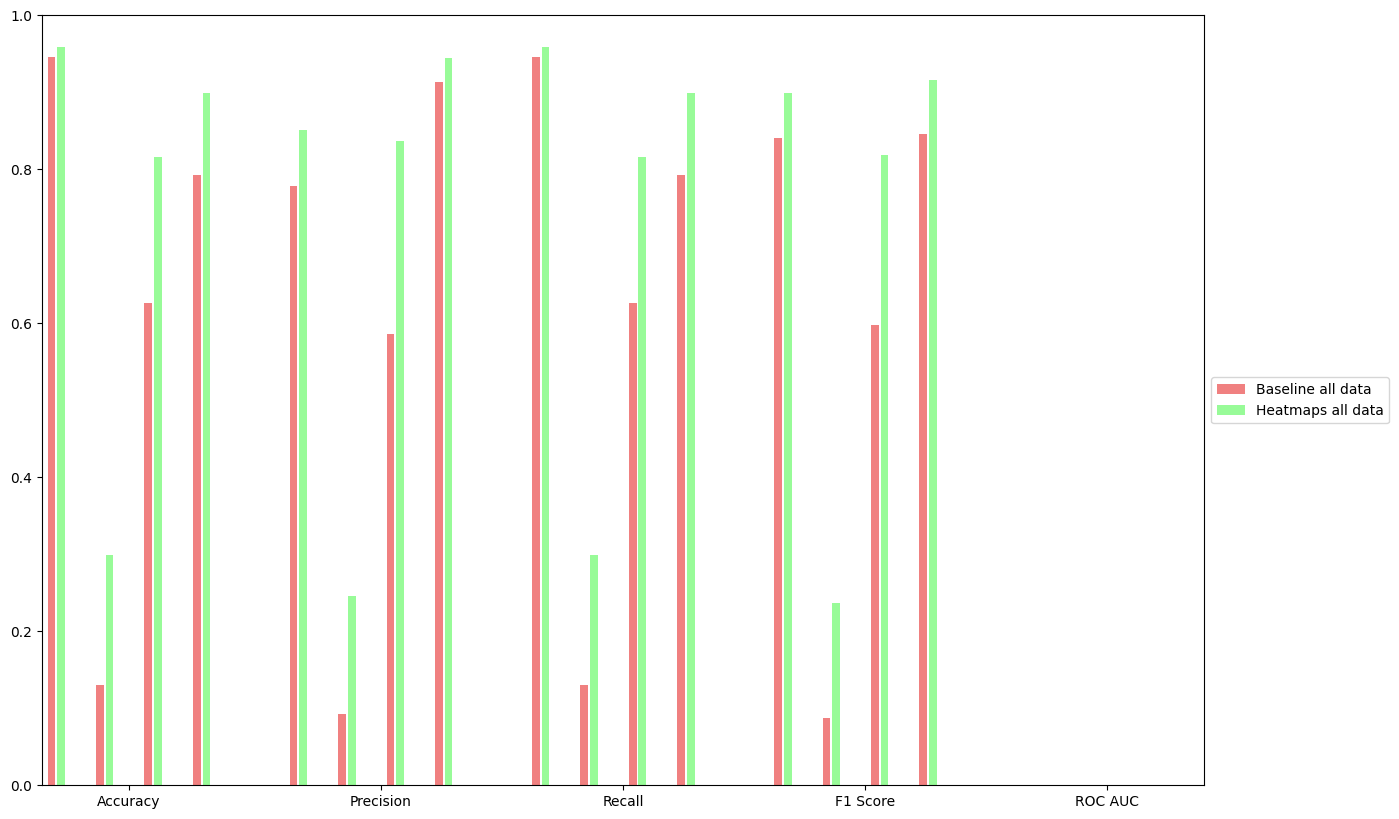

In [30]:
def load_results(file):
    with open(file, 'r') as f:
        results = json.load(f)
        accuracy = results['accuracy']
        precision = results['precision']
        recall = results['recall']
        f1_score = results['f1_score']
    return accuracy, precision, recall, f1_score

def plot_results(results_dir):
    all_results = []
    for i, file in enumerate(['fold1_metrics.json', 'fold2_metrics.json', 'fold3_metrics.json', 'fold4_metrics.json', 'fold5_metrics.json']):     
        accuracy, precision, recall, f1_score = load_results(os.path.join(results_dir, file))
        results = np.concatenate([accuracy,np.array([0]), precision,np.array([0]), recall,np.array([0]), f1_score])
        all_results.append(results)
    
    all_results = np.mean(all_results, axis=0)
    return all_results


results_dir = './models/baseline/v3/results_custom_thresholds'
results_baseline_balanced = plot_results(results_dir)
results_dir = './models/heatmaps/v3/results_custom_thresholds'
results_heatmaps_balanced = plot_results(results_dir)

results_dir = './models2/baseline/v1/results_custom_thresholds'
results_baseline_all = plot_results(results_dir)
results_dir = './models2/heatmaps/v1/results_custom_thresholds'
results_heatmaps_all = plot_results(results_dir)

# plot results in one plot, each with a different color
fig, ax = plt.subplots(1,1, figsize=(15,10))
n = results_baseline_balanced.shape[0]
# ax.bar(range(0,4*n, 4), results_baseline_red, color='red', label='Baseline Red')
# ax.bar(range(1,4*n, 4), results_heatmaps_only, color='blue', label='Heatmaps Only')
ax.bar(range(0,5*n, 5), results_baseline_all, color='lightcoral', label='Baseline all data')
ax.bar(range(1,5*n, 5), results_heatmaps_all, color='palegreen', label='Heatmaps all data')
# ax.bar(range(2,5*n, 5), results_baseline_balanced, color='red', label='Baseline balanced data')
# ax.bar(range(3,5*n, 5), results_heatmaps_balanced, color='green', label='Heatmaps balanced data')
#put legend to right side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# put label Accuracy, Precision, Recall, F1 Score, ROC AUC at x=8, x=34, x=59, x=84, x=109
#make ininvisivle ticks
ax.set_xticks([8, 34, 59, 84, 109])
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
ax.set_xlim(-1, 119)
ax.set_ylim(0,1)

In [6]:
import lightning.pytorch as pl
from model import ClassificationModel

# model_path = 'logs4/bl/my_model/version_42/checkpoints/epoch=27-step=454636.ckpt'
# model = ClassificationModel.load_from_checkpoint(model_path)
# print(model.hparams)
# model_path = 'logs4/bl/my_model/version_23/checkpoints/epoch=28-step=470873.ckpt'
# model = ClassificationModel.load_from_checkpoint(model_path)
# print(model.hparams)
# model_path = 'logs4/bl/my_model/version_8/checkpoints/epoch=21-step=357214.ckpt'
# model = ClassificationModel.load_from_checkpoint(model_path)
# print(model.hparams)

model_path = 'logs4/hm/my_model/version_45/checkpoints/epoch=6-step=56826.ckpt'
model = ClassificationModel.load_from_checkpoint(model_path)
print(model.hparams)
model_path = 'logs4/hm/my_model/version_22/checkpoints/epoch=11-step=194844.ckpt'
model = ClassificationModel.load_from_checkpoint(model_path)
print(model.hparams)
model_path = 'logs4/hm/my_model/version_35/checkpoints/epoch=11-step=194844.ckpt'
model = ClassificationModel.load_from_checkpoint(model_path)
print(model.hparams)

"config":      {'hidden_dim': 43, 'num_layers': 0, 'last_layer_dim': 39, 'lr': 3.174596194097272e-05, 'weight_decay': 0.02865007549783739, 'num_epochs': 100, 'log_dir': './logs4/hm', 'batch_size': 64}
"input_dim":   447
"loss_weight": tensor([7.3932e-06, 3.8316e-05, 1.5352e-05, 3.4117e-06], device='cuda:0')
"output_dim":  4
"config":      {'hidden_dim': 47, 'num_layers': 0, 'last_layer_dim': 15, 'lr': 1.969465059629719e-05, 'weight_decay': 0.023408216129688644, 'num_epochs': 100, 'log_dir': './logs4/hm', 'batch_size': 32}
"input_dim":   447
"loss_weight": tensor([7.3932e-06, 3.8316e-05, 1.5352e-05, 3.4117e-06], device='cuda:0')
"output_dim":  4
"config":      {'hidden_dim': 9, 'num_layers': 3, 'last_layer_dim': 7, 'lr': 6.901845408537136e-05, 'weight_decay': 2.517141032510143e-05, 'num_epochs': 100, 'log_dir': './logs4/hm', 'batch_size': 32}
"input_dim":   447
"loss_weight": tensor([7.3932e-06, 3.8316e-05, 1.5352e-05, 3.4117e-06], device='cuda:0')
"output_dim":  4
